In [24]:
%pylab inline
from itertools import combinations
import pandas as pd
import ipm
import scatter
mpl.rcParams['font.size'] = 16

#This is some sample metadata from the LQ92 XPP run
inFN = 'metadata.csv'

Populating the interactive namespace from numpy and matplotlib


/home/kevin/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim', 'xlim', 'norm', 'scatter', 'f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
M = pd.read_csv(inFN)


#Split the channels into separate columns with the proper dtype
M['ipm2_0'] = [float(i.split(',')[0]) for i in M['ipm2_channels']]
M['ipm2_1'] = [float(i.split(',')[1]) for i in M['ipm2_channels']]
M['ipm2_2'] = [float(i.split(',')[2]) for i in M['ipm2_channels']]
M['ipm2_3'] = [float(i.split(',')[3]) for i in M['ipm2_channels']]

M['ipm3_0'] = [float(i.split(',')[0]) for i in M['ipm3_channels']]
M['ipm3_1'] = [float(i.split(',')[1]) for i in M['ipm3_channels']]
M['ipm3_2'] = [float(i.split(',')[2]) for i in M['ipm3_channels']]
M['ipm3_3'] = [float(i.split(',')[3]) for i in M['ipm3_channels']]

del M['ipm2_channels']
del M['ipm3_channels']

M

,Unnamed: 0,filename,ipm2,ipm3,ipm2_xpos,ipm2_ypos,ipm3_xpos,ipm3_ypos,FILE,RUN,ipm2_0,ipm2_1,ipm2_2,ipm2_3,ipm3_0,ipm3_1,ipm3_2,ipm3_3
0,0,1_00001.tiff,0.851310,0.586469,-0.016900,0.125221,0.012388,0.586406,../off/1_00001.tiff,180,0.143890,0.292746,0.111864,0.302811,0.155952,0.197344,0.040658,0.192515
1,1,2_00001.tiff,0.469148,0.327600,-0.025254,0.138201,0.018927,0.608539,../off/2_00001.tiff,180,0.079725,0.160374,0.060365,0.168684,0.087439,0.111512,0.021279,0.107369
2,2,3_00001.tiff,0.418488,0.287545,-0.019781,0.120668,0.011618,0.603984,../off/3_00001.tiff,180,0.070417,0.143513,0.055253,0.149305,0.076300,0.097321,0.018838,0.095086
3,3,4_00001.tiff,0.235303,0.164481,-0.022372,0.133481,0.009250,0.585192,../off/4_00001.tiff,180,0.040738,0.079882,0.031144,0.083539,0.043416,0.055359,0.011361,0.054344
4,4,1_00002.tiff,0.698796,0.482403,-0.021384,0.137786,0.012191,0.585895,../off/1_00002.tiff,180,0.119628,0.239034,0.090654,0.249480,0.127951,0.162477,0.033410,0.158563
5,5,2_00002.tiff,0.527895,0.364755,-0.009291,0.130393,0.018898,0.586269,../off/2_00002.tiff,180,0.089873,0.182728,0.069139,0.186155,0.096213,0.124025,0.025094,0.119424
6,6,3_00002.tiff,0.382934,0.263283,-0.012549,0.126886,0.024448,0.575059,../off/3_00002.tiff,180,0.065306,0.131839,0.050599,0.135190,0.068975,0.089997,0.018609,0.085701
7,7,4_00002.tiff,0.018320,0.012882,0.058618,0.289906,0.002706,0.796101,../off/4_00002.tiff,180,0.003354,0.006944,0.001846,0.006175,0.003972,0.004241,0.000451,0.004218
8,8,1_00003.tiff,0.840705,0.580594,-0.024424,0.125937,0.012730,0.584278,../off/1_00003.tiff,180,0.142821,0.286337,0.110872,0.300674,0.154655,0.195132,0.040582,0.190226
9,9,2_00003.tiff,0.221799,0.154791,-0.019069,0.145193,0.020826,0.594280,../off/2_00003.tiff,180,0.037839,0.076373,0.028244,0.079342,0.040746,0.052917,0.010369,0.050758


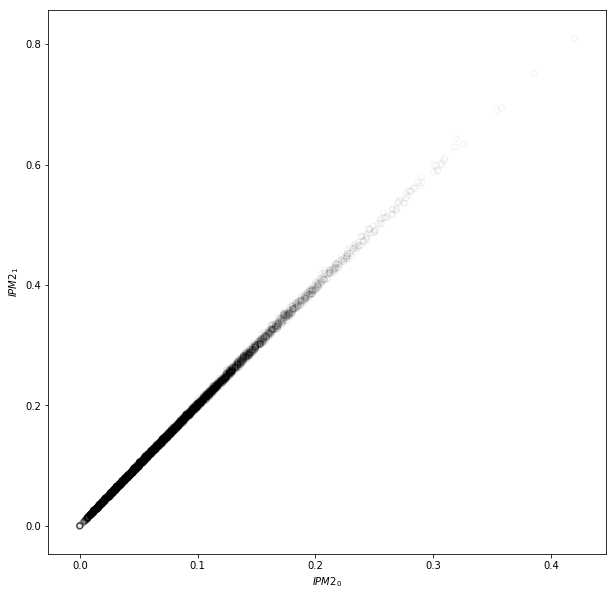

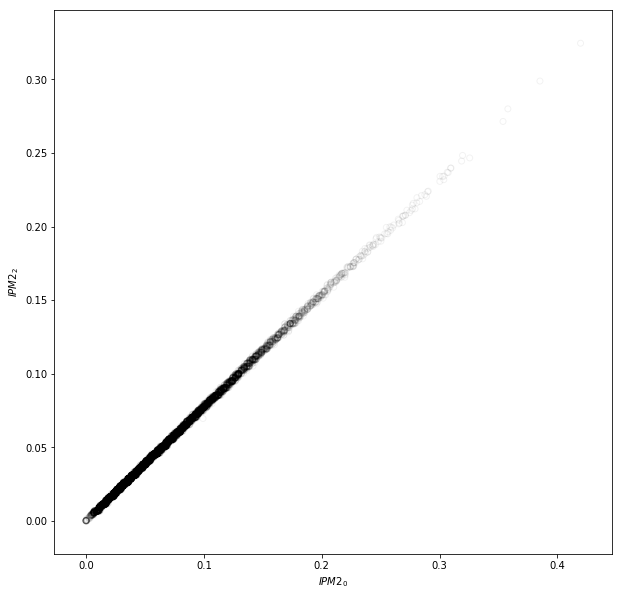

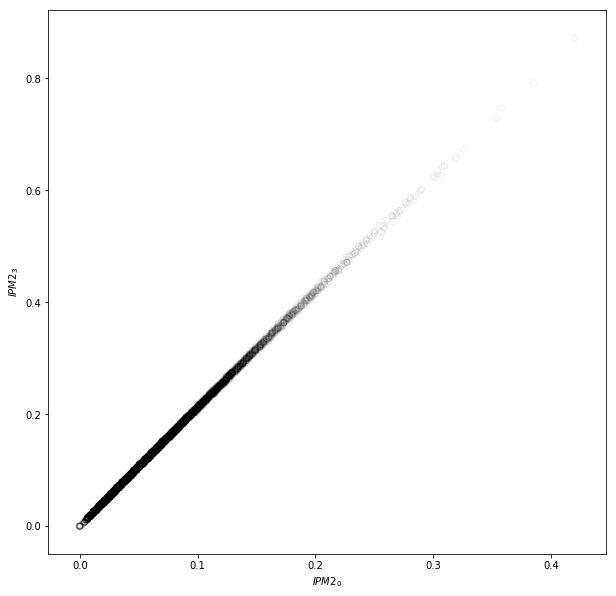

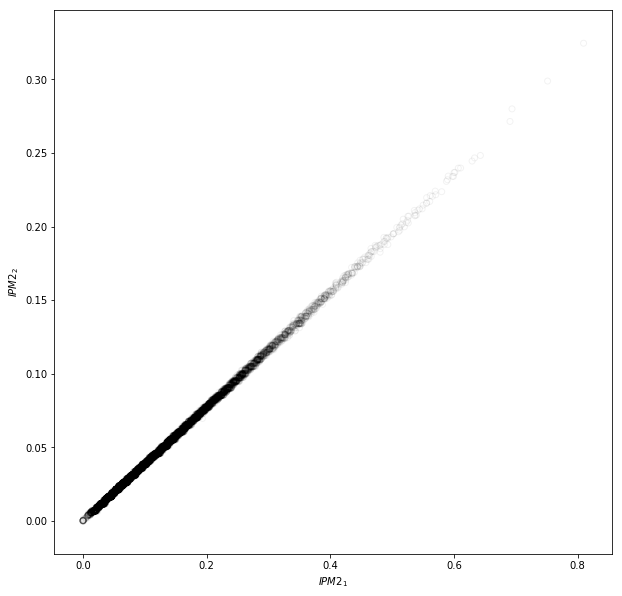

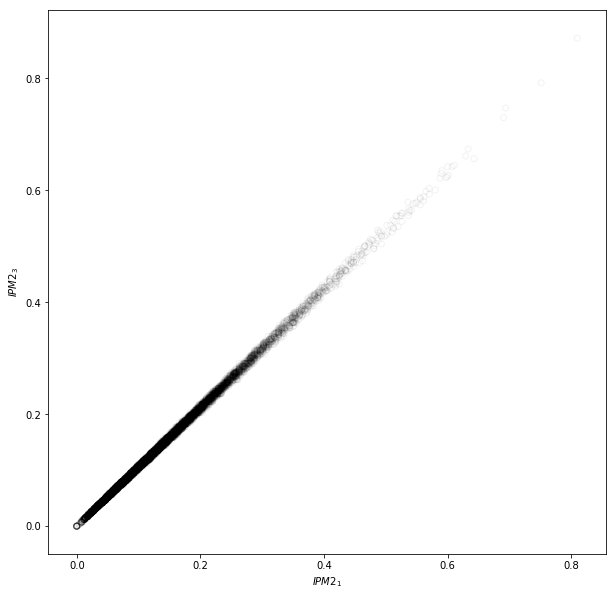

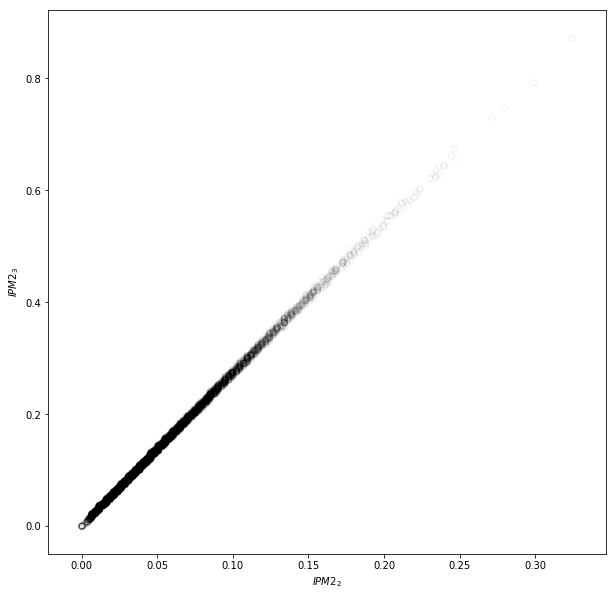

In [3]:

labels = {
    'ipm2_0': r"$IPM2_0$", 
    'ipm2_1': r"$IPM2_1$", 
    'ipm2_2': r"$IPM2_2$", 
    'ipm2_3': r"$IPM2_3$",
}

for i,j in combinations(labels, 2):
    x,y = np.array(M[i]), np.array(M[j])
    f = plt.figure(figsize=(10,10))
    plt.scatter(x, y, facecolors='none', edgecolors='k', alpha=0.05)
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
    plt.savefig("{}-{}".format(labels[i][1:-1], labels[j][1:-1]), fmt='png')

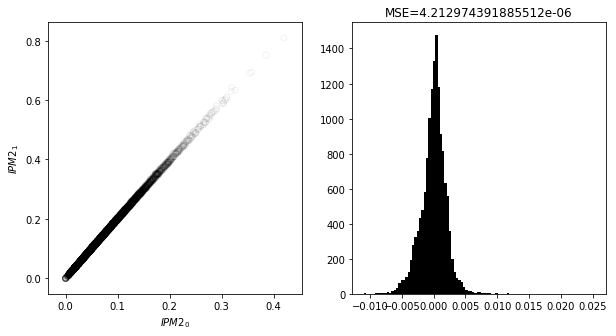

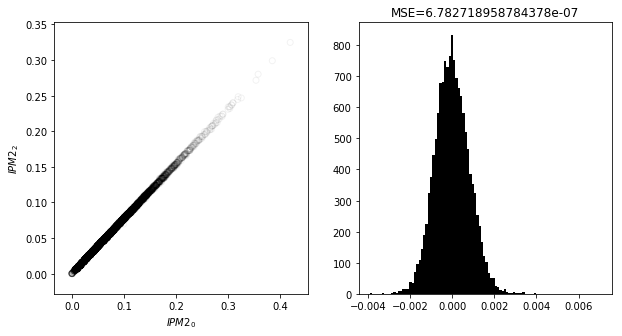

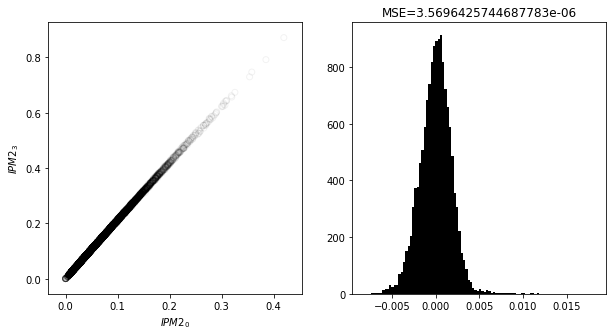

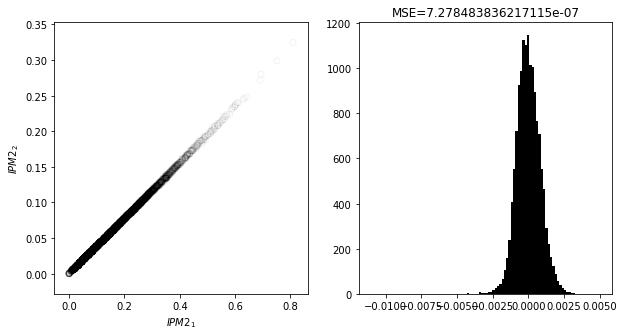

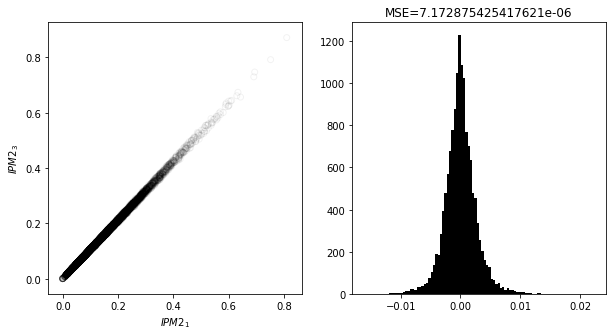

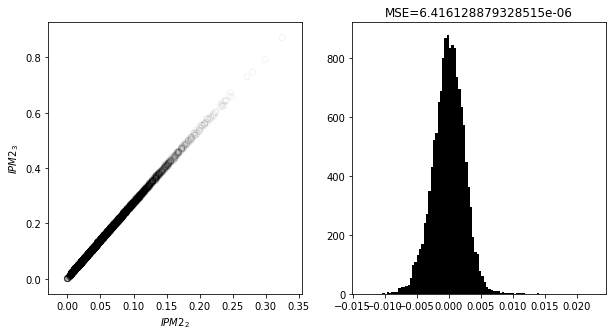

In [4]:
from itertools import combinations
import cvxpy as cvx

labels = {
    'ipm2_0': r"$IPM2_0$", 
    'ipm2_1': r"$IPM2_1$", 
    'ipm2_2': r"$IPM2_2$", 
    'ipm2_3': r"$IPM2_3$",
}

for i,j in combinations(labels, 2):
    x,y = np.array(M[i]), np.array(M[j])
    m,b = cvx.Variable(2)
    r = m*x + b - y
    p = cvx.Problem(cvx.Minimize(cvx.sum_squares(r)))
    p.solve(solver='SCS')
    
    
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(121)
    plt.scatter(x, y, facecolors='none', edgecolors='k', alpha=0.05)
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
    ax = f.add_subplot(122)

    hist(r.value, 100, color='k')
    plt.title("MSE={}".format(np.mean(np.square(r.value))))

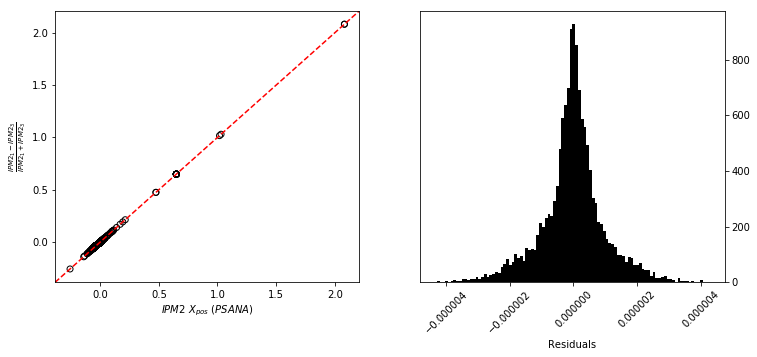

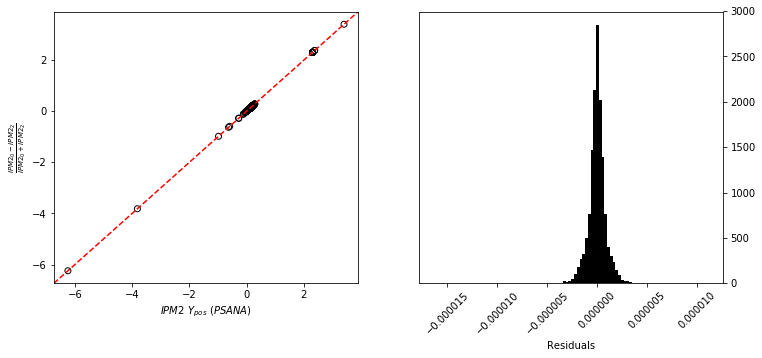

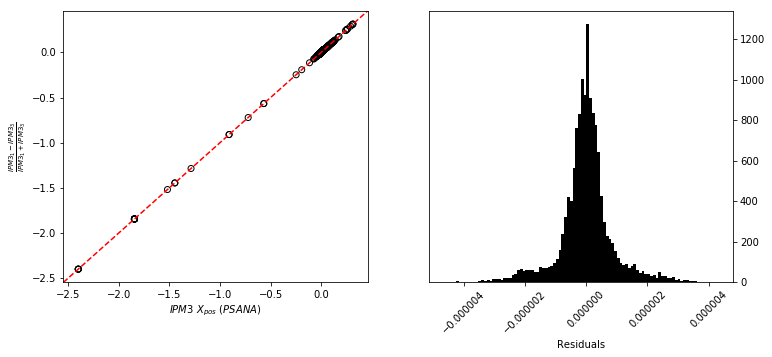

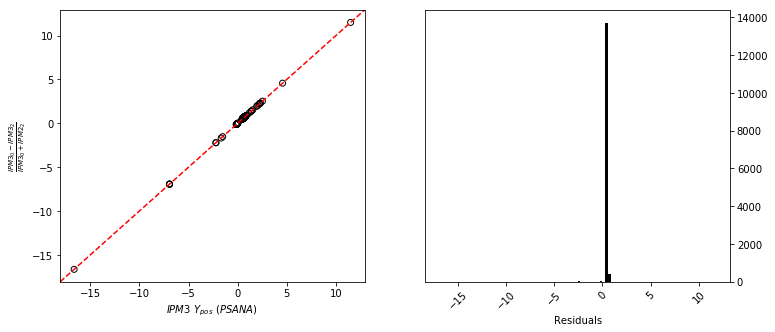

In [5]:
#Let's simply double check that we understand how the xpos and ypos calculations work for ipm2/3

f = plt.figure(figsize=(12, 5))
f.add_subplot(121)
xpos = (M['ipm2_1'] - M['ipm2_3']) / (M['ipm2_1'] + M['ipm2_3'])
plt.scatter(M['ipm2_xpos'], xpos, facecolors='none', edgecolors='k')
plt.xlabel(r"$IPM2\ X_{pos}\ (PSANA)$")
plt.ylabel(r"$\frac{IPM2_1 - IPM2_3} {IPM2_1 + IPM2_3}$")
xlim,ylim = plt.xlim(),plt.ylim()
lim = (max(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
plt.plot(np.linspace(lim[0], lim[1], 1000), np.linspace(lim[0], lim[1], 1000), '--r')
plt.xlim(xlim)
plt.ylim(ylim)
ax = f.add_subplot(122)
plt.hist(xpos - M['ipm2_xpos'], 100, color='k')
plt.xlabel("Residuals")
plt.xticks(rotation=45)
ax.yaxis.tick_right()

f = plt.figure(figsize=(12, 5))
f.add_subplot(121)
ypos = (M['ipm2_0'] - M['ipm2_2']) / (M['ipm2_0'] + M['ipm2_2'])
plt.scatter(M['ipm2_ypos'], ypos, facecolors='none', edgecolors='k')
plt.xlabel(r"$IPM2\ Y_{pos}\ (PSANA)$")
plt.ylabel(r"$\frac{IPM2_0 - IPM2_2} {IPM2_0 + IPM2_2}$")
xlim,ylim = plt.xlim(),plt.ylim()
lim = (max(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
plt.plot(np.linspace(lim[0], lim[1], 1000), np.linspace(lim[0], lim[1], 1000), '--r')
plt.xlim(xlim)
plt.ylim(ylim)
ax = f.add_subplot(122)
plt.hist(ypos - M['ipm2_ypos'], 100, color='k')
plt.xlabel("Residuals")
plt.xticks(rotation=45)
ax.yaxis.tick_right()



f = plt.figure(figsize=(12, 5))
f.add_subplot(121)
xpos = (M['ipm3_1'] - M['ipm3_3']) / (M['ipm3_1'] + M['ipm3_3'])
plt.scatter(M['ipm3_xpos'], xpos, facecolors='none', edgecolors='k')
plt.xlabel(r"$IPM3\ X_{pos}\ (PSANA)$")
plt.ylabel(r"$\frac{IPM3_1 - IPM3_3} {IPM3_1 + IPM3_3}$")
xlim,ylim = plt.xlim(),plt.ylim()
lim = (max(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
plt.plot(np.linspace(lim[0], lim[1], 1000), np.linspace(lim[0], lim[1], 1000), '--r')
plt.xlim(xlim)
plt.ylim(ylim)
ax = f.add_subplot(122)
plt.hist(xpos - M['ipm3_xpos'], 100, color='k')
plt.xlabel("Residuals")
plt.xticks(rotation=45)
ax.yaxis.tick_right()

f = plt.figure(figsize=(12, 5))
f.add_subplot(121)
ypos = (M['ipm3_0'] - M['ipm3_2']) / (M['ipm3_0'] + M['ipm3_2'])
plt.scatter(M['ipm3_ypos'], ypos, facecolors='none', edgecolors='k')
plt.xlabel(r"$IPM3\ Y_{pos}\ (PSANA)$")
plt.ylabel(r"$\frac{IPM3_0 - IPM3_2} {IPM3_0 + IPM2_2}$")
xlim,ylim = plt.xlim(),plt.ylim()
lim = (max(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
plt.plot(np.linspace(lim[0], lim[1], 1000), np.linspace(lim[0], lim[1], 1000), '--r')
plt.xlim(xlim)
plt.ylim(ylim)
ax = f.add_subplot(122)
plt.hist(ypos - M['ipm2_ypos'], 100, color='k')
plt.xlabel("Residuals")
plt.xticks(rotation=45)
ax.yaxis.tick_right()

([<matplotlib.axis.XTick at 0x7f14e60f9470>,
 <a list of 4 Text xticklabel objects>)

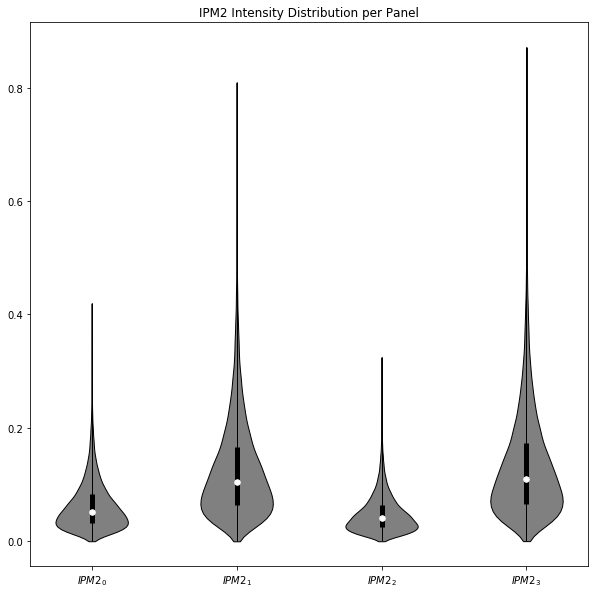

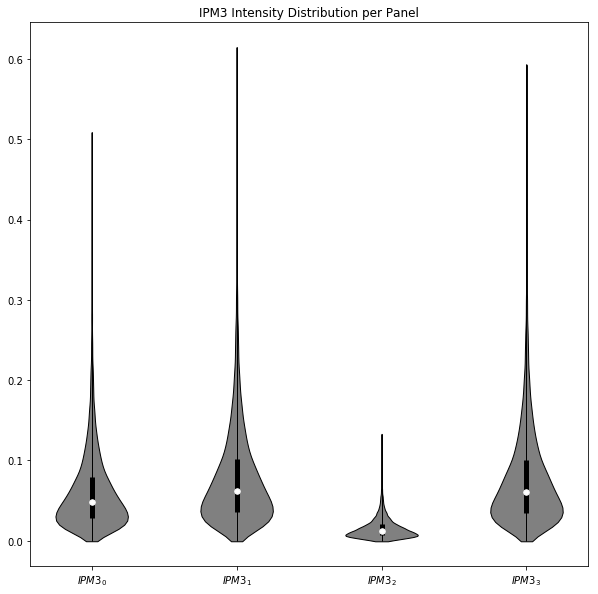

In [6]:
#IPM Horizontal Panels have systematically larger readings
plt.figure(figsize=(10,10))
plt.title(r"IPM2 Intensity Distribution per Panel")
data  = [M['ipm2_0'], M['ipm2_1'], M['ipm2_2'], M['ipm2_3']]
parts = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor("grey")
    pc.set_edgecolor("k")
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskersMin, whiskersMax = np.min(data, axis=1),np.max(data, axis=1)

inds = np.arange(1, len(medians) + 1)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

plt.xticks([1,2,3,4], ['$IPM2_0$','$IPM2_1$','$IPM2_2$','$IPM2_3$'])


plt.figure(figsize=(10,10))
plt.title(r"IPM3 Intensity Distribution per Panel")
data  = [M['ipm3_0'], M['ipm3_1'], M['ipm3_2'], M['ipm3_3']]
parts = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False)


for pc in parts['bodies']:
    pc.set_facecolor("grey")
    pc.set_edgecolor("k")
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskersMin, whiskersMax = np.min(data, axis=1),np.max(data, axis=1)

inds = np.arange(1, len(medians) + 1)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

plt.xticks([1,2,3,4], ['$IPM3_0$','$IPM3_1$','$IPM3_2$','$IPM3_3$'])

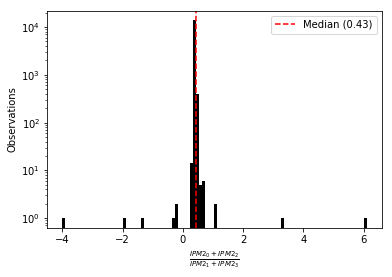

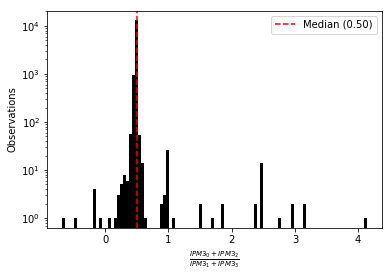

In [7]:
plt.figure()
D = (M['ipm2_0']+ M['ipm2_2']) / (M['ipm2_1'] + M['ipm2_3'])
plt.hist((M['ipm2_0']+ M['ipm2_2']) / (M['ipm2_1'] + M['ipm2_3']), 100, color='k')
plt.xlabel(r"$\frac {IPM2_0+IPM2_2}{IPM2_1+IPM2_3}$")
plt.ylabel('Observations')
plt.semilogy()
ymin,ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.vlines(np.median(D), ymin, ymax, 'r', '--')
plt.legend(['Median ({:0.2f})'.format(np.median(D))])

plt.figure()
D = (M['ipm3_0']+ M['ipm3_2']) / (M['ipm3_1'] + M['ipm3_3'])
plt.hist((M['ipm3_0']+ M['ipm3_2']) / (M['ipm3_1'] + M['ipm3_3']), 100, color='k')
plt.xlabel(r"$\frac {IPM3_0+IPM3_2}{IPM3_1+IPM3_3}$")
plt.ylabel('Observations')
plt.semilogy()
ymin,ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.vlines(np.median(D), ymin, ymax, 'r', '--')
plt.legend(['Median ({:0.2f})'.format(np.median(D))])


Text(0.5,0,'$Y_{pos}\\ \\mu m$')

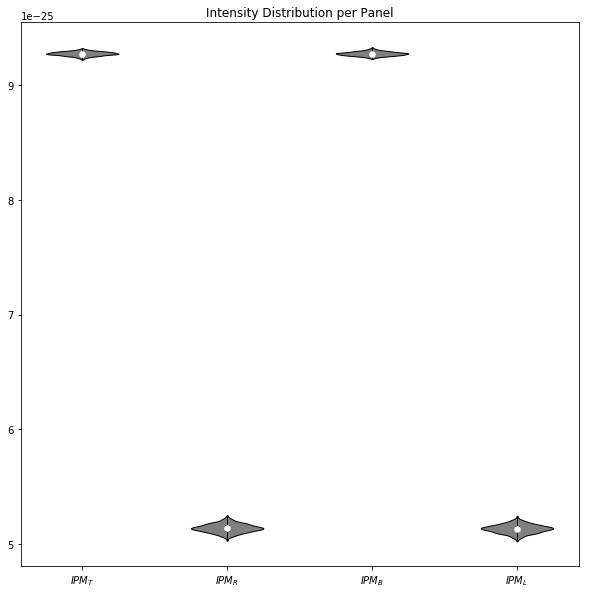

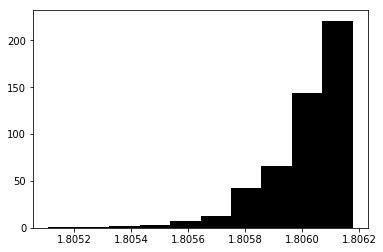

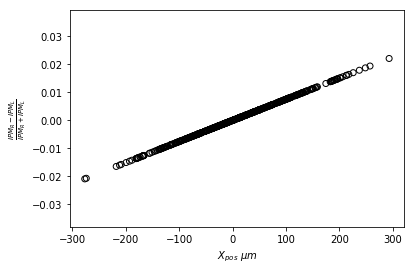

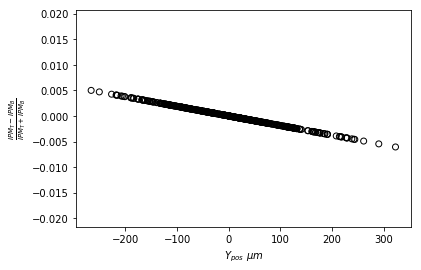

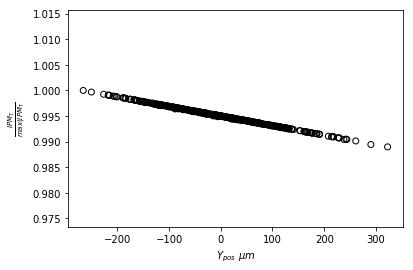

In [15]:
n = 500
xstd = 100.
ystd = 100.
xpos,ypos = np.random.normal(0., xstd, n),np.random.normal(0., ystd, n)
r = np.vstack([ipm.ipm_readings(10000., x, y) for x,y in zip(xpos,ypos)])

data = r.copy()

#IPM Horizontal Panels have systematically larger readings
plt.figure(figsize=(10,10))
plt.title(r"Intensity Distribution per Panel")
parts = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
plt.xticks([1,2,3,4], [r"$IPM_T$", r"$IPM_R$", r"$IPM_B$", r"$IPM_L$"])

for pc in parts['bodies']:
    pc.set_facecolor("grey")
    pc.set_edgecolor("k")
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=0)
whiskersMin, whiskersMax = np.min(data, axis=0),np.max(data, axis=0)

inds = np.arange(1, len(medians) + 1)

plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

plt.figure()
plt.hist((r[:,0]+r[:,2])/(r[:,1]+r[:,3]), color='k')

plt.figure()
xcalc = (r[:,1] - r[:,3]) / (r[:,1] + r[:,3])
plt.scatter(xpos, xcalc, facecolors='none', edgecolors='k')
plt.ylabel(r"$\frac{IPM_R - IPM_L}{IPM_R + IPM_L}$")
plt.xlabel(r"$X_{pos}\ \mu m$")

plt.figure()
ycalc = (r[:,0] - r[:,2]) / (r[:,0] + r[:,2])
plt.scatter(ypos, ycalc, facecolors='none', edgecolors='k')
plt.ylabel(r"$\frac{IPM_T - IPM_B}{IPM_T + IPM_B}$")
plt.xlabel(r"$Y_{pos}\ \mu m$")

plt.figure()
ycalc = (r[:,0] - r[:,2]) / (r[:,0] + r[:,2])
plt.scatter(ypos, r[:,0]/r[:,0].max(), facecolors='none', edgecolors='k')
plt.ylabel(r"$\frac{IPM_T}{max(IPM_T}$")
plt.xlabel(r"$Y_{pos}\ \mu m$")

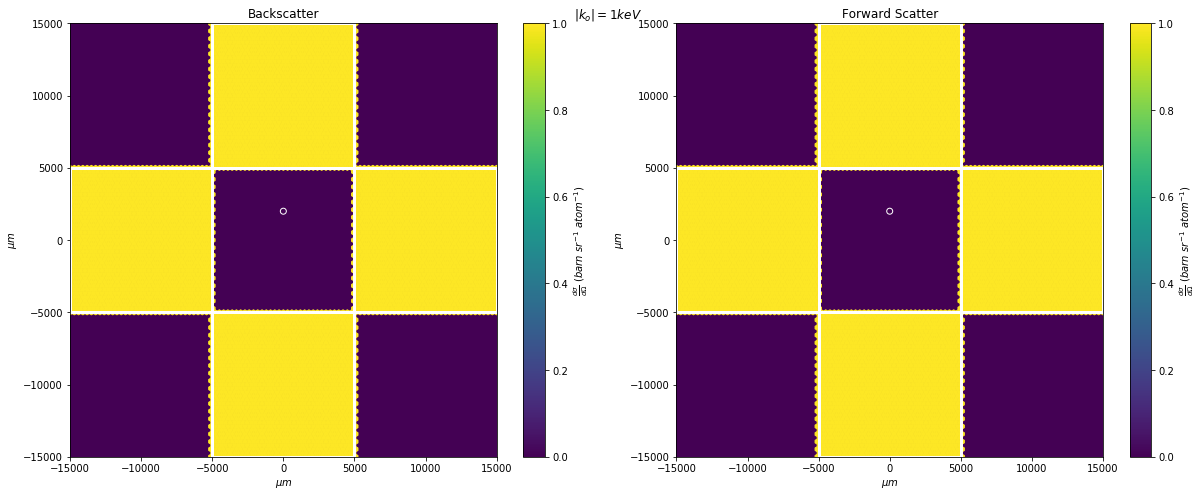

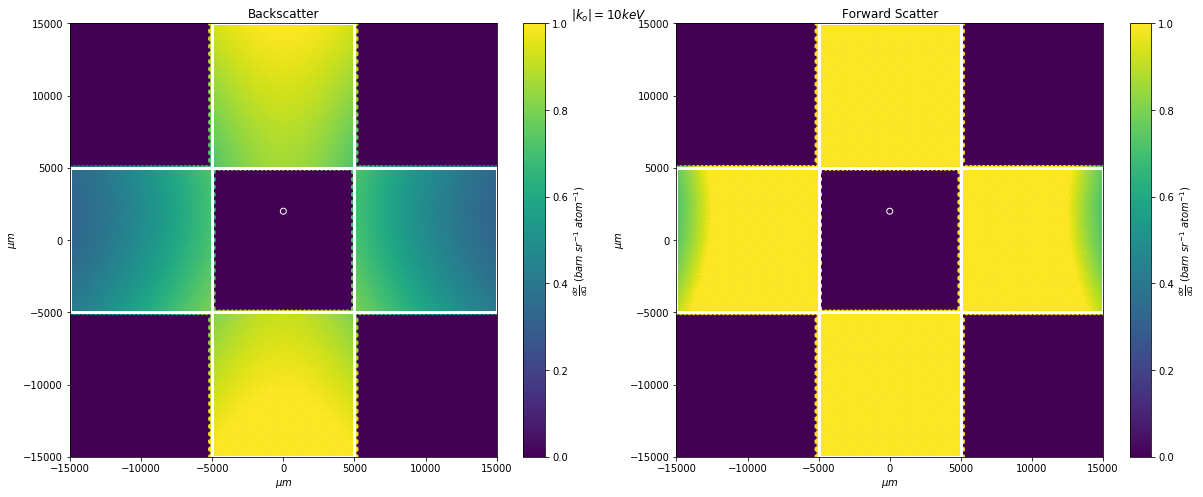

In [10]:
from importlib import reload
reload(ipm)
reload(ipm.scatter)

xpos,ypos = 0., 2000.
zmin,zmax = 0.,1.0
norm = mpl.colors.Normalize(zmin, zmax)

e = 1000.
f = plt.figure(figsize=(17, 7))

l = -10000.
si = ipm.differential_scattering(e, l=l, Z=14, xpos=xpos, ypos=ypos) 
n  = ipm.differential_scattering(e, l=l, Z=7, xpos=xpos, ypos=ypos) 
readings = {k:(3.*si[k] + 4.*n[k])/7. for k in si}
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, norm=norm, xpos=xpos, ypos=ypos)
ax.set_title("Backscatter")

l = 10000.
si = ipm.differential_scattering(e, l=l, Z=14, xpos=xpos, ypos=ypos) 
n  = ipm.differential_scattering(e, l=l, Z=7, xpos=xpos, ypos=ypos) 
readings = {k:(3.*si[k] + 4.*n[k])/7. for k in si}
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, norm=norm, xpos=xpos, ypos=ypos)
ax.set_title("Forward Scatter")
plt.tight_layout()

e = 10000.
f = plt.figure(figsize=(17, 7))

l = -10000.
si = ipm.differential_scattering(e, l=l, Z=14, xpos=xpos, ypos=ypos) 
n  = ipm.differential_scattering(e, l=l, Z=7, xpos=xpos, ypos=ypos) 
readings = {k:(3.*si[k] + 4.*n[k])/7. for k in si}
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, norm=norm, xpos=xpos, ypos=ypos)
ax.set_title("Backscatter")

l = 10000.
si = ipm.differential_scattering(e, l=l, Z=14, xpos=xpos, ypos=ypos) 
n  = ipm.differential_scattering(e, l=l, Z=7, xpos=xpos, ypos=ypos) 
readings = {k:(3.*si[k] + 4.*n[k])/7. for k in si}
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, norm=norm, xpos=xpos, ypos=ypos)
ax.set_title("Forward Scatter")
plt.tight_layout()

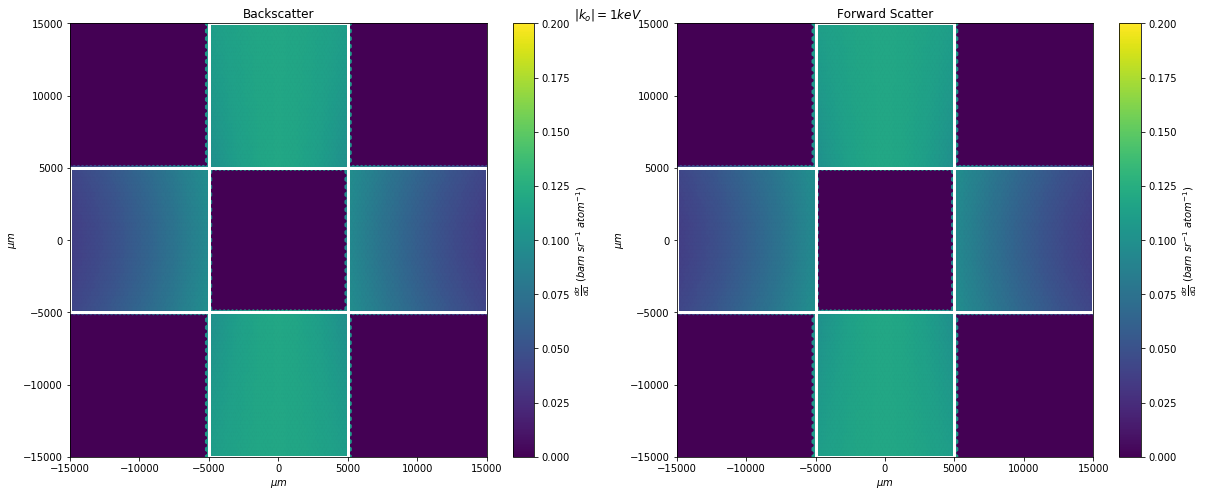

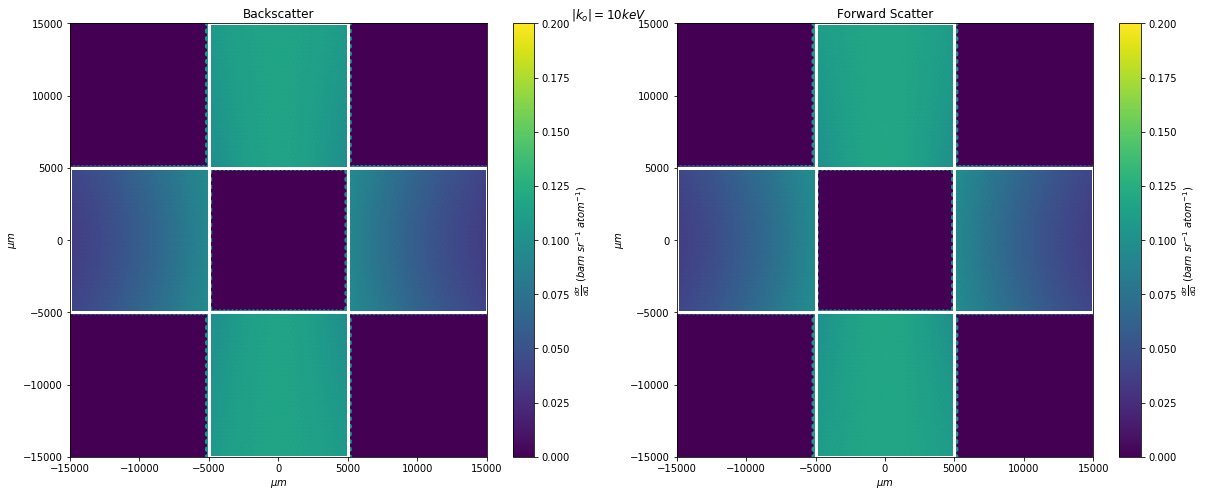

In [11]:
from importlib import reload
reload(ipm)
reload(ipm.scatter)

zmin,zmax = 0.,.2
norm = mpl.colors.Normalize(zmin, zmax)

e = 1000.
f = plt.figure(figsize=(17, 7))

l = -10000.
readings = ipm.differential_scattering(e, l=l, Z=None) 
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, norm=norm)
ax.set_title("Backscatter")

l = 10000.
readings = ipm.differential_scattering(e, l=l, Z=None) 
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, norm=norm)
ax.set_title("Forward Scatter")
plt.tight_layout()

e = 10000.
f = plt.figure(figsize=(17, 7))

l = -10000.
readings = ipm.differential_scattering(e, l=l, Z=None) 
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, norm=norm)
ax.set_title("Backscatter")

l = 10000.
readings = ipm.differential_scattering(e, l=l, Z=None) 
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, norm=norm)
ax.set_title("Forward Scatter")
plt.tight_layout()


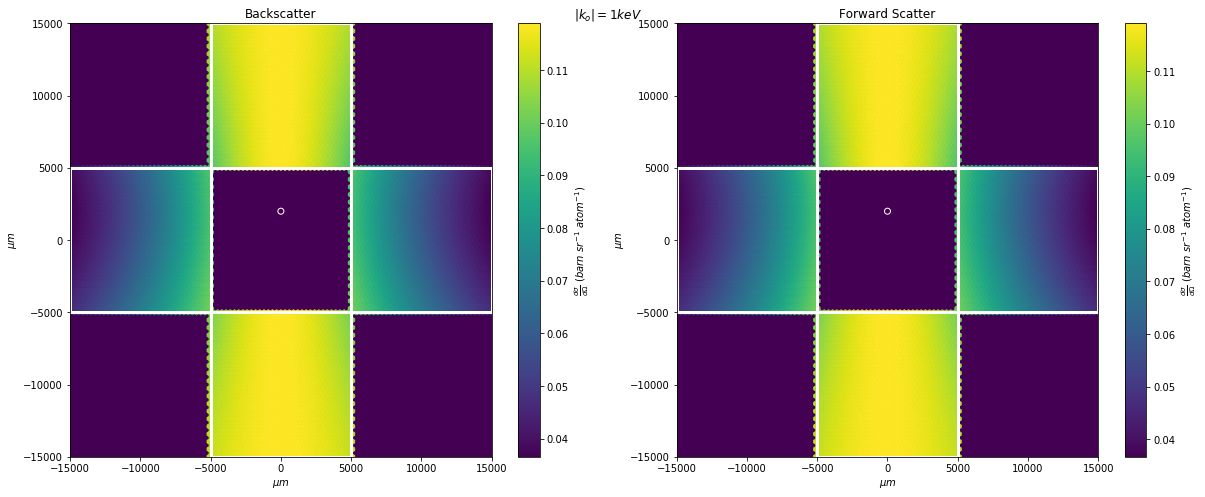

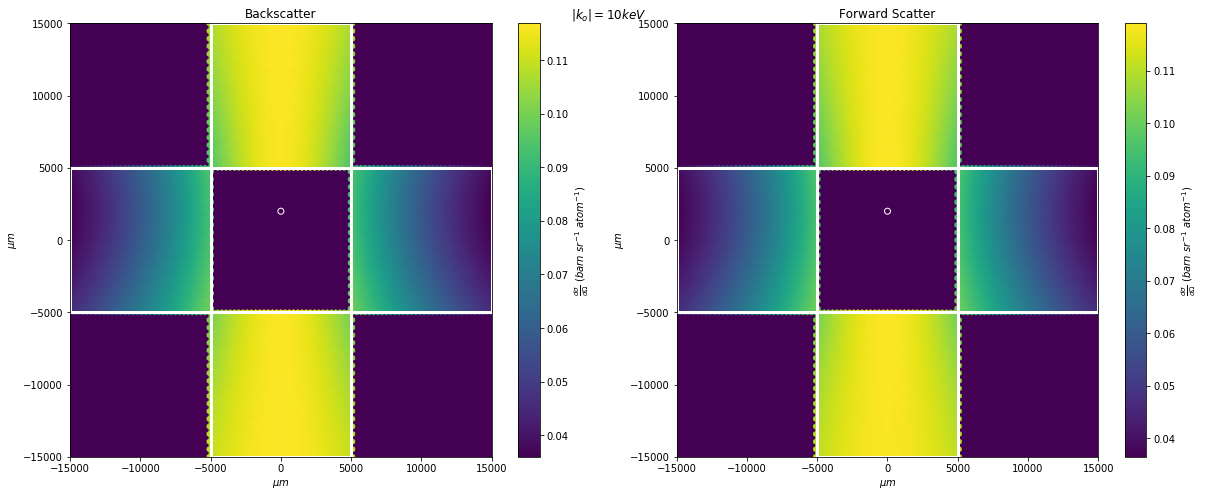

In [12]:
from importlib import reload
reload(ipm)
reload(ipm.scatter)

xpos,ypos = 0., 2000.
#zmin,zmax = 0.,0.15
#norm = mpl.colors.Normalize(zmin, zmax)

e = 1000.
f = plt.figure(figsize=(17, 7))

l = -10000.
readings = ipm.differential_scattering(e, l=l, xpos=xpos, ypos=ypos) 
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, xpos=xpos, ypos=ypos)
ax.set_title("Backscatter")

l = 10000.
readings = ipm.differential_scattering(e, l=l, xpos=xpos, ypos=ypos) 
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, xpos=xpos, ypos=ypos)
ax.set_title("Forward Scatter")
plt.tight_layout()

e = 10000.
f = plt.figure(figsize=(17, 7))

l = -10000.
readings = ipm.differential_scattering(e, l=l, xpos=xpos, ypos=ypos) 
f.suptitle(r"$|k_o|={}keV$".format(int(e/1000.)))
ax = f.add_subplot(121)
ax = ipm.plot_detector(readings, ax=ax, xpos=xpos, ypos=ypos)
ax.set_title("Backscatter")

l = 10000.
readings = ipm.differential_scattering(e, l=l, xpos=xpos, ypos=ypos) 
ax = f.add_subplot(122)
e = 10000
ax = ipm.plot_detector(readings, ax=ax, xpos=xpos, ypos=ypos)
ax.set_title("Forward Scatter")
plt.tight_layout()

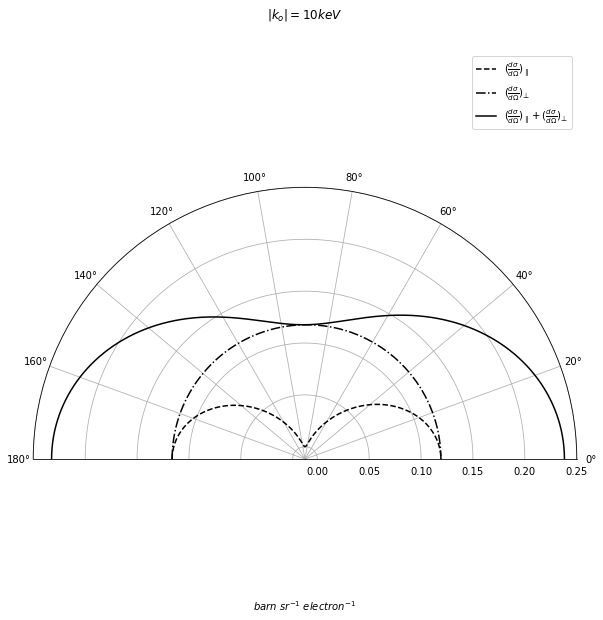

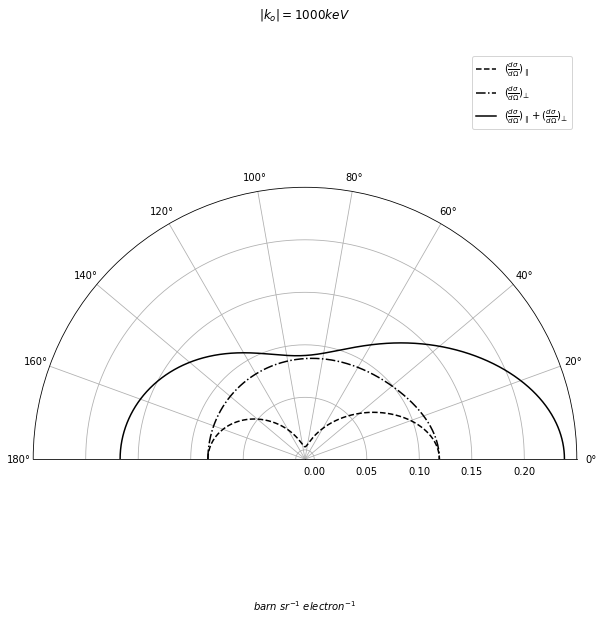

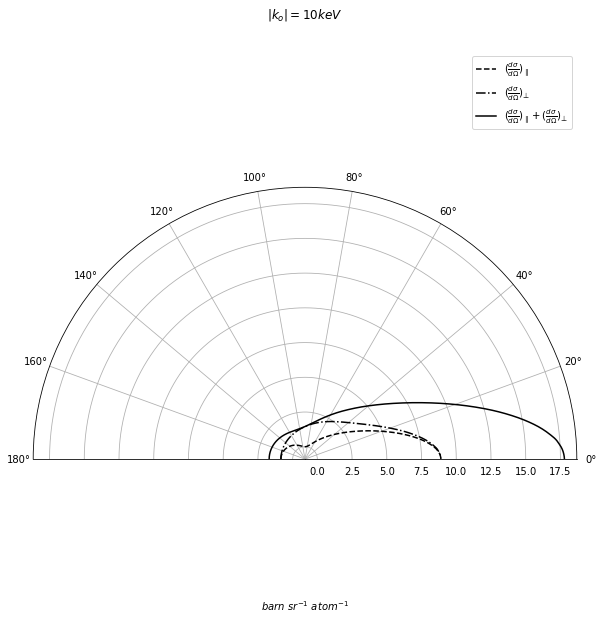

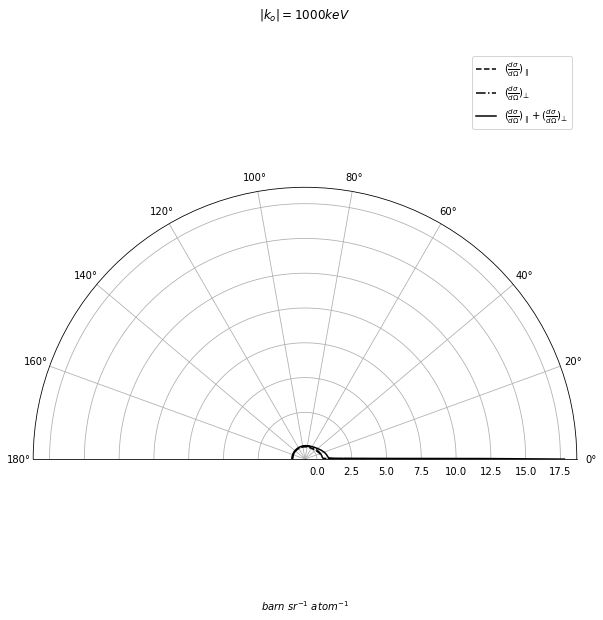

In [13]:
e = 10000

f = plt.figure(figsize=(10,10))
theta = np.linspace(0., pi, 1000)

spar = scatter.differential_intensity(theta, 0., e)*1e28
plt.polar(pi-theta, spar, linestyle='--', c='k')

sperp = scatter.differential_intensity(theta, pi/2., e)*1e28
plt.polar(pi-theta, sperp, linestyle='-.', c='k')

plt.polar(pi-theta, spar+sperp, c='k')

plt.legend([r"$(\frac {d\sigma} {d\Omega})_\parallel$",
            r"$(\frac {d\sigma} {d\Omega})_\bot$", 
            r"$(\frac {d\sigma} {d\Omega})_\parallel+ (\frac {d\sigma} {d\Omega})_\bot$", 
    ])
plt.title(r"$|k_o|={}keV$".format(int(e/1000.)))
plt.xlabel(r"$barn\ sr^{-1}\ electron^{-1}$")

ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)


e = 1000000

f = plt.figure(figsize=(10,10))
theta = np.linspace(0., pi, 1000)

spar = scatter.differential_intensity(theta, 0., e)*1e28
plt.polar(pi-theta, spar, linestyle='--', c='k')

sperp = scatter.differential_intensity(theta, pi/2., e)*1e28
plt.polar(pi-theta, sperp, linestyle='-.', c='k')

plt.polar(pi-theta, spar+sperp, c='k')

plt.legend([r"$(\frac {d\sigma} {d\Omega})_\parallel$",
            r"$(\frac {d\sigma} {d\Omega})_\bot$", 
            r"$(\frac {d\sigma} {d\Omega})_\parallel+ (\frac {d\sigma} {d\Omega})_\bot$", 
    ])
plt.title(r"$|k_o|={}keV$".format(int(e/1000.)))
plt.xlabel(r"$barn\ sr^{-1}\ electron^{-1}$")

ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)


e = 10000

f = plt.figure(figsize=(10,10))
theta = np.linspace(0., pi, 1000)

spar = 4.*scatter.differential_intensity(theta, 0., e, 7)*1e28
spar+= 3.*scatter.differential_intensity(theta, 0., e, 14)*1e28
spar = spar/7.
plt.polar(pi-theta, spar, linestyle='--', c='k')

sperp = 4.*scatter.differential_intensity(theta, pi/2., e, 7)*1e28
sperp+= 3.*scatter.differential_intensity(theta, pi/2., e, 14)*1e28
sperp = sperp/7.
plt.polar(pi-theta, sperp, linestyle='-.', c='k')

plt.polar(pi-theta, spar+sperp, c='k')

plt.legend([r"$(\frac {d\sigma} {d\Omega})_\parallel$",
            r"$(\frac {d\sigma} {d\Omega})_\bot$", 
            r"$(\frac {d\sigma} {d\Omega})_\parallel+ (\frac {d\sigma} {d\Omega})_\bot$", 
    ])
plt.title(r"$|k_o|={}keV$".format(int(e/1000.)))
plt.xlabel(r"$barn\ sr^{-1}\ atom^{-1}$")

ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)


e = 1000000

f = plt.figure(figsize=(10,10))
theta = np.linspace(0., pi, 1000)

spar = 4.*scatter.differential_intensity(theta, 0., e, 7)*1e28
spar+= 3.*scatter.differential_intensity(theta, 0., e, 14)*1e28
spar = spar/7.
plt.polar(pi-theta, spar, linestyle='--', c='k')

sperp = 4.*scatter.differential_intensity(theta, pi/2., e, 7)*1e28
sperp+= 3.*scatter.differential_intensity(theta, pi/2., e, 14)*1e28
sperp = sperp/7.
plt.polar(pi-theta, sperp, linestyle='-.', c='k')

plt.polar(pi-theta, spar+sperp, c='k')

plt.legend([r"$(\frac {d\sigma} {d\Omega})_\parallel$",
            r"$(\frac {d\sigma} {d\Omega})_\bot$", 
            r"$(\frac {d\sigma} {d\Omega})_\parallel+ (\frac {d\sigma} {d\Omega})_\bot$", 
    ])
plt.title(r"$|k_o|={}keV$".format(int(e/1000.)))
plt.xlabel(r"$barn\ sr^{-1}\ atom^{-1}$")

ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)

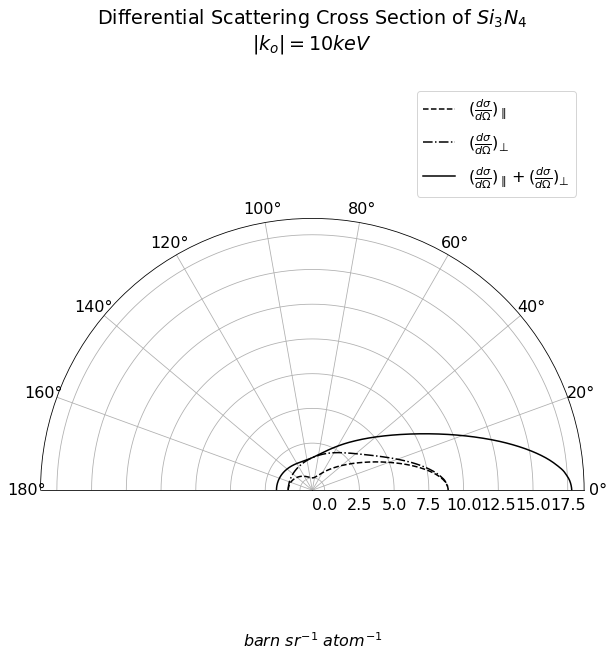

In [30]:
e = 10000

f = plt.figure(figsize=(10,10))
theta = np.linspace(0., pi, 1000)

spar = (3./7.)*scatter.differential_intensity(theta, 0., e, Z=14)*1e28  +\
       (4./7.)*scatter.differential_intensity(theta, 0., e, Z=7)*1e28
plt.polar(pi-theta, spar, linestyle='--', c='k')

sperp = (3./7.)*scatter.differential_intensity(theta, np.pi/2., e, Z=14)*1e28  +\
        (4./7.)*scatter.differential_intensity(theta, np.pi/2., e, Z=7)*1e28
plt.polar(pi-theta, sperp, linestyle='-.', c='k')

plt.polar(pi-theta, spar+sperp, c='k')

plt.legend([r"$(\frac {d\sigma} {d\Omega})_\parallel$",
            r"$(\frac {d\sigma} {d\Omega})_\bot$", 
            r"$(\frac {d\sigma} {d\Omega})_\parallel+ (\frac {d\sigma} {d\Omega})_\bot$", 
    ])
plt.title(r"""Differential Scattering Cross Section of $Si_3N_4$ 
$|k_o|={}keV$""".format(int(e/1000.)))
plt.xlabel(r"$barn\ sr^{-1}\ atom^{-1}$")

ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)